In [6]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## Dataset

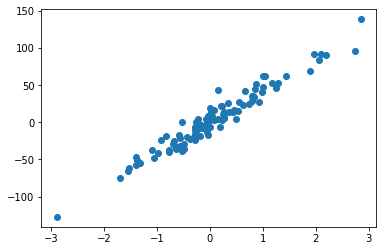

In [10]:
x, y = make_regression(n_samples= 100, n_features=1, noise = 10)
plt.scatter(x, y)

In [13]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [22]:
#matrice X
X = np.hstack((x, np.ones(x.shape)))
X.shape

(100, 2)

In [24]:
theta = np.random.randn(2, 1)
theta.shape

(2, 1)

## Modèle

In [26]:
def model (X, theta):
    return X.dot(theta)

In [30]:
#model(X, theta)

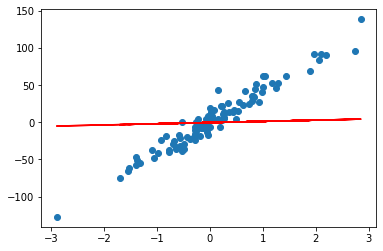

In [34]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

## Fonction coût

In [36]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [39]:
cost_function(X, y, theta)

820.4288463319456

## Gradient descent

In [40]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [54]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

## ML

In [55]:
# Change learning_rate or n_iterations for better results
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [56]:
theta_final

array([[42.12295189],
       [ 0.9465371 ]])

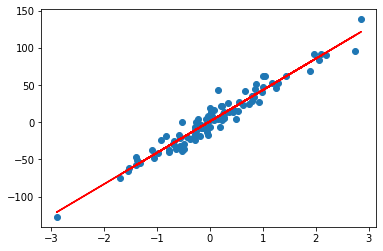

In [57]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

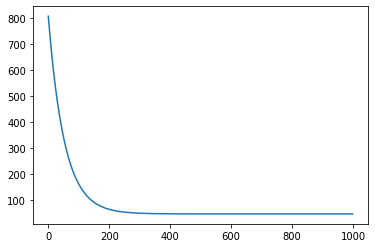

In [58]:
plt.plot(range(1000), cost_history)

In [61]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [63]:
coef_determination(y, predictions)

0.9467903298381274